In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv(Path('Monarch_Watch_2017.csv'))
df.head()

,TAG,DATE,CITY,STATE/PROV,ZIP/POST,COUNTRY,LAT,LONG,FIRST,NOTES
0,XAT710,8/1/2017,SOUTHWEST HARBOR,ME,4679,USA,44.279865,-68.330071,KHRIS,feeding on 'gay feather' on the coast!
1,XCN101,8/8/2017,KETTERING,OH,45409,USA,39.724144,-84.183354,MARGARET,Son and his best friend found near nature reserve
2,XUC556,8/9/2017,WYOMING,MI,49509,USA,42.883860,-85.706160,PHIL,NaN
3,WPU203,8/11/2017,EAST LANSING,MI,48824,USA,42.653979,-84.492032,OREN,"Children's garden MSU. Have good photos, can s..."
4,XEL625,8/12/2017,FISH CREEK,WI,54212,USA,45.105511,-87.217607,PUM,"Found at nature center, peninsula state park"


In [3]:
# adding a column for year
df['year'] = pd.DatetimeIndex(df['DATE']).year
df.head()

,TAG,DATE,CITY,STATE/PROV,ZIP/POST,COUNTRY,LAT,LONG,FIRST,NOTES,year
0,XAT710,8/1/2017,SOUTHWEST HARBOR,ME,4679,USA,44.279865,-68.330071,KHRIS,feeding on 'gay feather' on the coast!,2017
1,XCN101,8/8/2017,KETTERING,OH,45409,USA,39.724144,-84.183354,MARGARET,Son and his best friend found near nature reserve,2017
2,XUC556,8/9/2017,WYOMING,MI,49509,USA,42.883860,-85.706160,PHIL,NaN,2017
3,WPU203,8/11/2017,EAST LANSING,MI,48824,USA,42.653979,-84.492032,OREN,"Children's garden MSU. Have good photos, can s...",2017
4,XEL625,8/12/2017,FISH CREEK,WI,54212,USA,45.105511,-87.217607,PUM,"Found at nature center, peninsula state park",2017


In [5]:
# Adding a column for month

df['month'] = pd.DatetimeIndex(df['DATE']).month
df.head()

,TAG,DATE,CITY,STATE/PROV,ZIP/POST,COUNTRY,LAT,LONG,FIRST,NOTES,year,month
0,XAT710,8/1/2017,SOUTHWEST HARBOR,ME,4679,USA,44.279865,-68.330071,KHRIS,feeding on 'gay feather' on the coast!,2017,8
1,XCN101,8/8/2017,KETTERING,OH,45409,USA,39.724144,-84.183354,MARGARET,Son and his best friend found near nature reserve,2017,8
2,XUC556,8/9/2017,WYOMING,MI,49509,USA,42.883860,-85.706160,PHIL,NaN,2017,8
3,WPU203,8/11/2017,EAST LANSING,MI,48824,USA,42.653979,-84.492032,OREN,"Children's garden MSU. Have good photos, can s...",2017,8
4,XEL625,8/12/2017,FISH CREEK,WI,54212,USA,45.105511,-87.217607,PUM,"Found at nature center, peninsula state park",2017,8


In [6]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["month"]).count()
counts = counts.reset_index()
counts

,month,TAG,DATE,CITY,STATE/PROV,ZIP/POST,COUNTRY,LAT,LONG,FIRST,NOTES,year
0,1,9,9,9,9,9,9,9,9,9,6,9
1,8,66,66,66,66,66,66,66,66,65,53,66
2,9,378,378,378,378,376,378,378,378,365,281,378
3,10,296,296,296,296,295,296,296,296,285,251,296
4,11,88,88,88,88,88,88,88,88,83,76,88
5,12,17,17,17,17,17,17,17,17,17,14,17


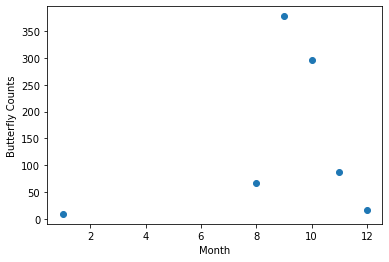

In [9]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
plt.scatter(counts.month, counts.DATE)
plt.xlabel('Month')
plt.ylabel('Butterfly Counts')
plt.show()

In [10]:
# using reshape
X = counts.month.values.reshape(-1, 1)

In [13]:
# setting the y axis as the count of dates
y = counts.DATE

In [14]:
# setting the model
model = LinearRegression()

In [15]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [16]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(6,)


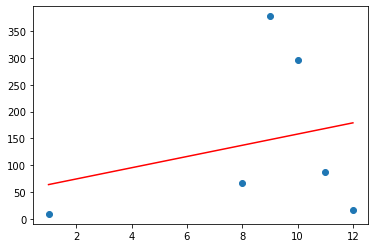

In [17]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [18]:
# creating a polynomial function that allows us to input degrees for fitting
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (6, 3)


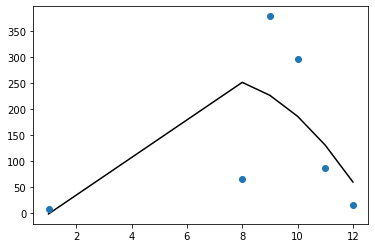

In [19]:
# two degree fit
fit_and_plot_poly_deg(2)

X_poly shape is: (6, 4)


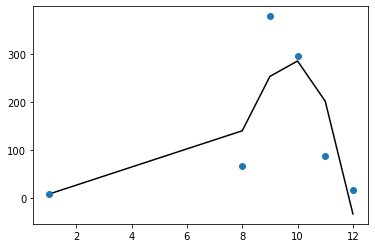

In [20]:
# 3rd degree fit
fit_and_plot_poly_deg(3)

X_poly shape is: (6, 5)


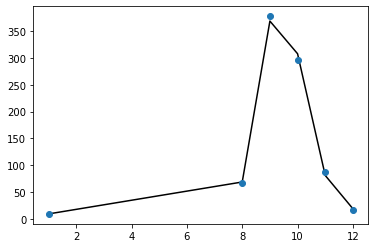

In [21]:
# 4th degree
fit_and_plot_poly_deg(4)